# <center>Airy Stress Function Equation for a Body with Two Different Materials in a Plane Stress Problem</center>
## <center><b>(Applied Elasticity Term Project - Part 2)</b></center>
### <center><b>Submission by: Group No. 5</b></center>

<b>Team Members:-</b>
<br>Dewang Suresh Gandhi (20ME63R27)</br>
<br>Saksham Kumar (20ME63R44)</br>
<br>Shivanshu Zamdagni (20ME63S01)</br>
<br>Vishwanadhapalli Ganesh(20ME63R24)</br>

### <b>Problem Introduction</b> 
<br>The aim of this project is to calculate the governing Airy stress function equation for a two dimensional plane stress problem where we have two materials joined at an interface. So basically, we have been given a body which has two parts, one of them being material 1, the other being material 2. Let the two materials have Young's modulus as $E_1$ and $E_2$ respectively. Therefore, we have a situation as shown in below figure

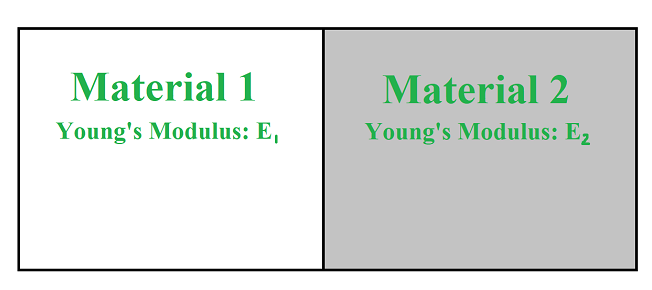

### <b>Motivation and Formulation Method</b> 
<br>The reason for choosing this problem is that this problem is addressing a very general situation which is also very relevant in practical situations as we often see two materials joined to form a body. In this project, we'll be taking tanh kind of variation for our Young's modulus as tanh is often used as a substitute for the step function. The function tanh(x) quickly changes from -1 to +1 within a short range as we vary x from a negative number to a positive number, so it can be used to write the general expression of Young's modulus. One added advantage of this tanh approach is that we would not have to worry about the boundary conditions at the interface. 

Lets choose our origin at the interface of the two materials, i.e., we have $x = 0$ at the interface. We will be using tanh function to account for the variation of Young's modulus at the interface as it quickly changes from -1 to +1 near $x = 0$. We know, 
$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$.

We have prompted the user to input the Young's modulus of the two materials so that the same code can be utilised for any general case. 
For this project, we will be taking a body which has two materials, one side aluminium having $E_1 = 70 Gpa$ and the other side steel, having $E_2 = 210 GPa$.

Summarizing all this, we have a body which has Aluminium for $x < 0$ and Steel for $x > 0$. We define a general expression of Young's modulus as: $E(x) = E_a + E_0 tanh(x)$. We can easily see that for $x << 0$, we should have $E(x)\simeq E_1$ and for $x >> 0$, we should have $E(x)\simeq E_2$. Now depending on the user's input for the two materials, we can calculate $E_a$ and $E_0$ and then, proceed using the general express of $E(x)$.

<br>So basically, through our tanh(x) function, we are achieving something like this:-
<br>(We can see that we are transitioning from $E_1$ to $E_2$ within a short range near the interface.)
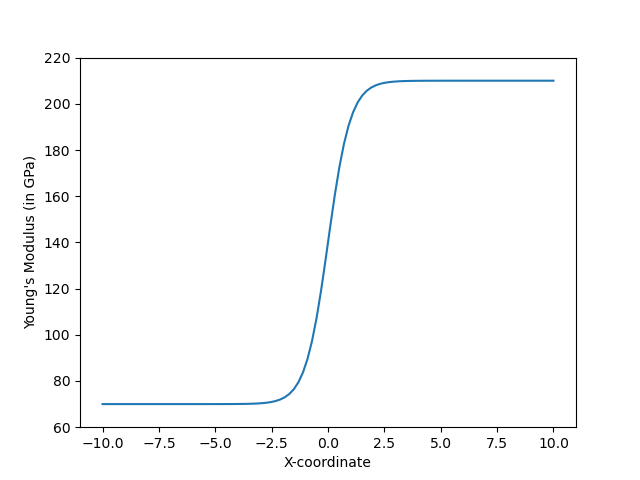
{
<br>This graph has been plotted using Python by running the following Python code:-
<br>import math
<br>import matplotlib.pyplot as plt
<br>import numpy as np
<br>
<br>x = np.linspace(-10,10,100)
<br>y = []
<br>
<br>for element in x:
<br>	value = 140 + 70*math.tanh(element)
<br>	y.append(value)

<br>plt.plot(x,y)
<br>plt.xlabel('X-coordinate')
<br>plt.ylabel("Young's Modulus (in GPa)")
<br>plt.ylim([60,220])
<br>plt.show()
<br>}

So after we have done all this, we will proceed along the path of combining the three equations- the constitutive law, the stress equilibrium equations and the compatibiliy relation to obtain our Airy stress function equation.
<br><br><b>Location of Different Parts of the Problem</b>
<br><br>1. Asking the user for the values of $E_1$ and $E_2$: In[3]
<br>2. Solving the system of equations to get the values of $E_a$ and $E_b$: In[5]
<br>3. Defining the stress fields in terms of airy stress function: In[7]
<br>4. Defining the strain components in terms of the stress fields: In[7]
<br>5. Defining the strain components in terms of airy stress function: In[8]
<br>6. Merging of the three equations (constitutive law, stress equilibrium equations and compatibility equations) and simplification: In[9] to In[18]


In [19]:
import sympy as sym
import math

Defining elasticity modulus in variation with tanh function:

In [2]:
Ea, Eb, x, y = sym.symbols('E_a, E_b, x, y')        
#display(Ea, Eb, x)

E = sym.Function('E')(x)
lhs1 = E
rhs1 = Ea + Eb*sym.tanh(x)
eq1 = sym.Eq(lhs1,rhs1)

display(eq1)

Eq(E(x), E_a + E_b*tanh(x))

We ask the user for the Young's modulus of each of the two materials. For our case, we have given the two inputs as 70 (Young's modulus of aluminium in GPa) and 210 GPa (Young's modulus of steel in GPa).

In [3]:
E1 = float(input('Enter the value of elasticity modulus of first material i.e for x<0 in Gpa '))
E2 = float(input('Enter the value of elasticity modulus of second material i.e for x>0 in Gpa '))

Enter the value of elasticity modulus of first material i.e for x<0 in Gpa 70
Enter the value of elasticity modulus of second material i.e for x>0 in Gpa 210


Now, lets calculate $E_a$ and $E_0$ for the entered values of $E_1$ and $E_2$ by solving the two equations. These two equations are obtained by substituting the values of $E_1$ and $E_2$ in the general expression of Young's modulus: $E(x) = E_a + E_0 tanh(x)$, and using the fact that for $x << 0$, $tanh(x) \simeq -1$ and for $x >> 0$, $tanh(x) \simeq +1$.
We get these two equations after the substitution:- <br>$E_1 = E_a - E_0$ <br>$E_2 = E_a + E_0$

In [4]:
lhs2 = E1
rhs2 = Ea - Eb
eq2 = sym.Eq(lhs2,rhs2)
lhs3 = E2
rhs3 = Ea + Eb
eq3 = sym.Eq(lhs3,rhs3)

display(eq2,eq3)

Eq(70.0, E_a - E_b)

Eq(210.0, E_a + E_b)

In [5]:
soln, = sym.linsolve([eq2,eq3],[Ea, Eb])
Y1 = (soln[0])*10**9
Y2 = (soln[1])*10**9
display(Y1,Y2)                          

140000000000.000

70000000000.0000

These Y1 and Y2 values will later be substituted in Ea and Eb after simplification.

In [6]:
# Defining Poisson's ratio
nu= sym.symbols('nu')
#display(nu)

We defined the different stress fields, $\sigma_{xx}, \sigma_{yy}$ and $\sigma_{xy}$ in terms of the Airy stress function, $\varphi$. Using constitutive laws, we then defined the different components of strain, $\epsilon_{xx}, \epsilon_{yy}$ and $\epsilon_{xy}$ in terms of the stress fields.

In [7]:
phi = sym.Function('varphi')(x,y)
#display(phi)
sigmaxx = sym.Function('sigma_xx')(x,y)
sigmayy = sym.Function('sigma_yy')(x,y)
sigmaxy = sym.Function('sigma_xy')(x,y)
#display(sigmaxx,sigmayy,sigmaxy)
epsxx = sym.Function('epsilon_xx')(x,y)
epsyy = sym.Function('epsilon_yy')(x,y)
epsxy = sym.Function('epsilon_xy')(x,y)
#display(epsxx,epsyy,epsxy)
lhs4 = epsxx
rhs4 = (1/E)*(sigmaxx - nu*sigmayy)
eq4 = sym.Eq(lhs4,rhs4)

lhs5 = epsyy
rhs5 = (1/E)*(sigmayy - nu*sigmaxx)
eq5 = sym.Eq(lhs5,rhs5)

lhs6 = epsxy
rhs6 = ((1+nu)/E)*(sigmaxy)
eq6 = sym.Eq(lhs6,rhs6)

display(eq4,eq5,eq6)



Eq(epsilon_xx(x, y), (-nu*sigma_yy(x, y) + sigma_xx(x, y))/E(x))

Eq(epsilon_yy(x, y), (-nu*sigma_xx(x, y) + sigma_yy(x, y))/E(x))

Eq(epsilon_xy(x, y), (nu + 1)*sigma_xy(x, y)/E(x))

We can write the above strain fields in terms of Airy stress function. We know:
$\sigma_{xx} = \frac{\partial^2 \varphi}{\partial y^2}$;
$\sigma_{yy} = \frac{\partial^2 \varphi}{\partial x^2}$;
$\sigma_{xy} = -\frac{\partial^2 \varphi}{\partial x \partial y}$.

In [8]:
sigmaxx = sym.diff(phi,(y,2))
#display(sigmaxx)

sigmayy = sym.diff(phi,(x,2))
# display(sigmayy)

sigmaxy = -sym.diff(phi,x,y)
# display(sigmaxy)

rhs7 = (1/E)*(sigmaxx - nu*sigmayy)
eq7 = sym.Eq(epsxx,rhs7)

rhs8 = (1/E)*(sigmayy - nu*sigmaxx)
eq8 = sym.Eq(epsyy,rhs8)

rhs9 = ((1+nu)/E)*(sigmaxy)
eq9 = sym.Eq(epsxy,rhs9)

display(eq7,eq8,eq9)

Eq(epsilon_xx(x, y), (-nu*Derivative(varphi(x, y), (x, 2)) + Derivative(varphi(x, y), (y, 2)))/E(x))

Eq(epsilon_yy(x, y), (-nu*Derivative(varphi(x, y), (y, 2)) + Derivative(varphi(x, y), (x, 2)))/E(x))

Eq(epsilon_xy(x, y), -(nu + 1)*Derivative(varphi(x, y), x, y)/E(x))

We now will substitute these equations 7, 8 and 9 into the compatibility relations. We will use this compatibility equation: $\frac{\partial^2 \epsilon_{xx}}{\partial y^2} + \frac{\partial^2 \epsilon_{yy}}{\partial x^2} = 2 \frac{\partial^2 \epsilon_{xy}}{\partial x \partial y}$.

In [9]:
lhs10 = (sym.diff(epsxx,(y,2)) + sym.diff(epsyy,(x,2))).subs([(epsxx,rhs7),(epsyy,rhs8)])
# display(lhs10)

rhs10 = 2*sym.diff(epsxy,x,y).subs(epsxy,rhs9)
# display(rhs10)

eq10= sym.Eq(lhs10-rhs10,0).simplify()
display(eq10.subs(E,rhs1))

Eq(Derivative((-nu*Derivative(varphi(x, y), (x, 2)) + Derivative(varphi(x, y), (y, 2)))/(E_a + E_b*tanh(x)), (y, 2)) + Derivative((-nu*Derivative(varphi(x, y), (y, 2)) + Derivative(varphi(x, y), (x, 2)))/(E_a + E_b*tanh(x)), (x, 2)) - 2*Derivative(-(nu + 1)*Derivative(varphi(x, y), x, y)/(E_a + E_b*tanh(x)), x, y), 0)

Now lets expand the terms of the equation on LHS side and see if can be simplified.

In [10]:
lhs11=eq10.lhs.subs(E,rhs1).subs(sym.tanh(x),(sym.exp(x)-sym.exp(-x))/(sym.exp(x)+sym.exp(-x))).expand().simplify().expand().simplify()
eq11=sym.Eq(lhs11,0)
display(eq11)

Eq((E_a**2*exp(6*x)*Derivative(varphi(x, y), (x, 4)) + E_a**2*exp(6*x)*Derivative(varphi(x, y), (y, 4)) + 2*E_a**2*exp(6*x)*Derivative(varphi(x, y), (x, 2), (y, 2)) + 3*E_a**2*exp(4*x)*Derivative(varphi(x, y), (x, 4)) + 3*E_a**2*exp(4*x)*Derivative(varphi(x, y), (y, 4)) + 6*E_a**2*exp(4*x)*Derivative(varphi(x, y), (x, 2), (y, 2)) + 3*E_a**2*exp(2*x)*Derivative(varphi(x, y), (x, 4)) + 3*E_a**2*exp(2*x)*Derivative(varphi(x, y), (y, 4)) + 6*E_a**2*exp(2*x)*Derivative(varphi(x, y), (x, 2), (y, 2)) + E_a**2*Derivative(varphi(x, y), (x, 4)) + E_a**2*Derivative(varphi(x, y), (y, 4)) + 2*E_a**2*Derivative(varphi(x, y), (x, 2), (y, 2)) - 8*E_a*E_b*nu*exp(4*x)*Derivative(varphi(x, y), (y, 2)) + 8*E_a*E_b*nu*exp(2*x)*Derivative(varphi(x, y), (y, 2)) + 2*E_a*E_b*exp(6*x)*Derivative(varphi(x, y), (x, 4)) + 2*E_a*E_b*exp(6*x)*Derivative(varphi(x, y), (y, 4)) + 4*E_a*E_b*exp(6*x)*Derivative(varphi(x, y), (x, 2), (y, 2)) + 8*E_a*E_b*exp(4*x)*Derivative(varphi(x, y), (x, 2)) - 8*E_a*E_b*exp(4*x)*Deriva

We simpliy the above equation by removing the denominator.

In [11]:
lhs12=eq11.lhs*((Ea**3)*(sym.exp(6*x)+3*sym.exp(4*x)+3*sym.exp(2*x)+1)+(3*Ea**2*Eb)*(sym.exp(6*x)+sym.exp(4*x)-sym.exp(2*x)-1)+(3*Ea*Eb**2)*(sym.exp(6*x)-sym.exp(4*x)-sym.exp(2*x)+1)+(Eb**3)*(sym.exp(6*x)-3*sym.exp(4*x)+3*sym.exp(2*x)-1))
#display(lhs12)
eq12=sym.Eq(lhs12,0).expand().simplify()
display(eq12)

Eq(E_a**2*exp(6*x)*Derivative(varphi(x, y), (x, 4)) + E_a**2*exp(6*x)*Derivative(varphi(x, y), (y, 4)) + 2*E_a**2*exp(6*x)*Derivative(varphi(x, y), (x, 2), (y, 2)) + 3*E_a**2*exp(4*x)*Derivative(varphi(x, y), (x, 4)) + 3*E_a**2*exp(4*x)*Derivative(varphi(x, y), (y, 4)) + 6*E_a**2*exp(4*x)*Derivative(varphi(x, y), (x, 2), (y, 2)) + 3*E_a**2*exp(2*x)*Derivative(varphi(x, y), (x, 4)) + 3*E_a**2*exp(2*x)*Derivative(varphi(x, y), (y, 4)) + 6*E_a**2*exp(2*x)*Derivative(varphi(x, y), (x, 2), (y, 2)) + E_a**2*Derivative(varphi(x, y), (x, 4)) + E_a**2*Derivative(varphi(x, y), (y, 4)) + 2*E_a**2*Derivative(varphi(x, y), (x, 2), (y, 2)) - 8*E_a*E_b*nu*exp(4*x)*Derivative(varphi(x, y), (y, 2)) + 8*E_a*E_b*nu*exp(2*x)*Derivative(varphi(x, y), (y, 2)) + 2*E_a*E_b*exp(6*x)*Derivative(varphi(x, y), (x, 4)) + 2*E_a*E_b*exp(6*x)*Derivative(varphi(x, y), (y, 4)) + 4*E_a*E_b*exp(6*x)*Derivative(varphi(x, y), (x, 2), (y, 2)) + 8*E_a*E_b*exp(4*x)*Derivative(varphi(x, y), (x, 2)) - 8*E_a*E_b*exp(4*x)*Derivat

To simplify the above equation, we are taking coefficients of each differentiating term.

In [12]:
c1,c2,c3,c4,c5,c6,c7=sym.symbols('c_1,c_2,c_3,c_4,c_5,c_6,c_7')
j=eq12.lhs.expand()
#display(j)
b1=j.coeff(sym.diff(phi,(y,2))).simplify()
display(sym.Eq(c1,b1))

b2=j.coeff(sym.diff(phi,(x,2))).simplify()
display(sym.Eq(c2,b2))

b3=j.coeff(sym.diff(phi,(x,4))).simplify()
display(sym.Eq(c3,b3))

b4=j.coeff(sym.diff(phi,(y,4))).simplify()
display(sym.Eq(c4,b4))

b5=j.coeff(sym.diff(phi,(x,2),(y,2))).simplify()
display(sym.Eq(c5,b5))

b6=j.coeff(sym.diff(phi,(x,3))).simplify()
display(sym.Eq(c6,b6))

b7=j.coeff(sym.diff(phi,(y,2),x)).simplify()
display(sym.Eq(c7,b7))

Eq(c_1, 8*E_b*nu*(-E_a*exp(2*x) + E_a - E_b*exp(2*x) - E_b)*exp(2*x))

Eq(c_2, 8*E_b*(E_a*exp(2*x) - E_a + E_b*exp(2*x) + E_b)*exp(2*x))

Eq(c_3, E_a**2*exp(6*x) + 3*E_a**2*exp(4*x) + 3*E_a**2*exp(2*x) + E_a**2 + 2*E_a*E_b*exp(6*x) + 2*E_a*E_b*exp(4*x) - 2*E_a*E_b*exp(2*x) - 2*E_a*E_b + E_b**2*exp(6*x) - E_b**2*exp(4*x) - E_b**2*exp(2*x) + E_b**2)

Eq(c_4, E_a**2*exp(6*x) + 3*E_a**2*exp(4*x) + 3*E_a**2*exp(2*x) + E_a**2 + 2*E_a*E_b*exp(6*x) + 2*E_a*E_b*exp(4*x) - 2*E_a*E_b*exp(2*x) - 2*E_a*E_b + E_b**2*exp(6*x) - E_b**2*exp(4*x) - E_b**2*exp(2*x) + E_b**2)

Eq(c_5, 2*E_a**2*exp(6*x) + 6*E_a**2*exp(4*x) + 6*E_a**2*exp(2*x) + 2*E_a**2 + 4*E_a*E_b*exp(6*x) + 4*E_a*E_b*exp(4*x) - 4*E_a*E_b*exp(2*x) - 4*E_a*E_b + 2*E_b**2*exp(6*x) - 2*E_b**2*exp(4*x) - 2*E_b**2*exp(2*x) + 2*E_b**2)

Eq(c_6, 8*E_b*(-E_a*exp(2*x) - E_a - E_b*exp(2*x) + E_b)*exp(2*x))

Eq(c_7, 8*E_b*(-E_a*exp(2*x) - E_a - E_b*exp(2*x) + E_b)*exp(2*x))

Now let's write the equation after taking coefficients of each differentiating term.

In [13]:
eq13=sym.Eq(b1*(sym.diff(phi,(y,2)))+b2*sym.diff(phi,(x,2))+b3*sym.diff(phi,(x,4))+b4*sym.diff(phi,(y,4))+b5*sym.diff(phi,(x,2),(y,2))+b6*sym.diff(phi,(x,3))+b7*sym.diff(phi,(y,2),x),0)
display(eq13)

Eq(8*E_b*nu*(-E_a*exp(2*x) + E_a - E_b*exp(2*x) - E_b)*exp(2*x)*Derivative(varphi(x, y), (y, 2)) + 8*E_b*(-E_a*exp(2*x) - E_a - E_b*exp(2*x) + E_b)*exp(2*x)*Derivative(varphi(x, y), (x, 3)) + 8*E_b*(-E_a*exp(2*x) - E_a - E_b*exp(2*x) + E_b)*exp(2*x)*Derivative(varphi(x, y), x, (y, 2)) + 8*E_b*(E_a*exp(2*x) - E_a + E_b*exp(2*x) + E_b)*exp(2*x)*Derivative(varphi(x, y), (x, 2)) + (E_a**2*exp(6*x) + 3*E_a**2*exp(4*x) + 3*E_a**2*exp(2*x) + E_a**2 + 2*E_a*E_b*exp(6*x) + 2*E_a*E_b*exp(4*x) - 2*E_a*E_b*exp(2*x) - 2*E_a*E_b + E_b**2*exp(6*x) - E_b**2*exp(4*x) - E_b**2*exp(2*x) + E_b**2)*Derivative(varphi(x, y), (x, 4)) + (E_a**2*exp(6*x) + 3*E_a**2*exp(4*x) + 3*E_a**2*exp(2*x) + E_a**2 + 2*E_a*E_b*exp(6*x) + 2*E_a*E_b*exp(4*x) - 2*E_a*E_b*exp(2*x) - 2*E_a*E_b + E_b**2*exp(6*x) - E_b**2*exp(4*x) - E_b**2*exp(2*x) + E_b**2)*Derivative(varphi(x, y), (y, 4)) + (2*E_a**2*exp(6*x) + 6*E_a**2*exp(4*x) + 6*E_a**2*exp(2*x) + 2*E_a**2 + 4*E_a*E_b*exp(6*x) + 4*E_a*E_b*exp(4*x) - 4*E_a*E_b*exp(2*x) - 4*E_a

Now, we will define the Laplacian and the Biharmonic operator.

In [14]:
def del_delx(f):
    return sym.diff(f,x)
def del_dely(f):
    return sym.diff(f,y)
def del2_delx(f):
    return del_delx(del_delx(f))
def del2_dely(f):
    return del_dely(del_dely(f))

def Cart_Laplacian(f):
    return del2_delx(f) + del2_dely(f)

def biharmonic(f):
    return Cart_Laplacian(Cart_Laplacian(f))

#display (Cart_Laplacian(phi))

#display (biharmonic(phi))

from IPython.display import Math, Latex
display(Math(r'\nabla^2 \varphi(x,y) = {}'.format(sym.latex(Cart_Laplacian(phi)))))

from IPython.display import Math, Latex
display(Math(r'\nabla^4 \varphi(x,y) = {}'.format(sym.latex(biharmonic(phi)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Adding and subtracting, $c_2*\frac{\partial^2 \varphi}{\partial y^2}$; in eq13

In [15]:
eq14 = sym.Eq(eq13.lhs+(b2)*sym.diff(phi,(y,2)), (b2)*sym.diff(phi,(y,2)))
display(eq14)

Eq(8*E_b*nu*(-E_a*exp(2*x) + E_a - E_b*exp(2*x) - E_b)*exp(2*x)*Derivative(varphi(x, y), (y, 2)) + 8*E_b*(-E_a*exp(2*x) - E_a - E_b*exp(2*x) + E_b)*exp(2*x)*Derivative(varphi(x, y), (x, 3)) + 8*E_b*(-E_a*exp(2*x) - E_a - E_b*exp(2*x) + E_b)*exp(2*x)*Derivative(varphi(x, y), x, (y, 2)) + 8*E_b*(E_a*exp(2*x) - E_a + E_b*exp(2*x) + E_b)*exp(2*x)*Derivative(varphi(x, y), (x, 2)) + 8*E_b*(E_a*exp(2*x) - E_a + E_b*exp(2*x) + E_b)*exp(2*x)*Derivative(varphi(x, y), (y, 2)) + (E_a**2*exp(6*x) + 3*E_a**2*exp(4*x) + 3*E_a**2*exp(2*x) + E_a**2 + 2*E_a*E_b*exp(6*x) + 2*E_a*E_b*exp(4*x) - 2*E_a*E_b*exp(2*x) - 2*E_a*E_b + E_b**2*exp(6*x) - E_b**2*exp(4*x) - E_b**2*exp(2*x) + E_b**2)*Derivative(varphi(x, y), (x, 4)) + (E_a**2*exp(6*x) + 3*E_a**2*exp(4*x) + 3*E_a**2*exp(2*x) + E_a**2 + 2*E_a*E_b*exp(6*x) + 2*E_a*E_b*exp(4*x) - 2*E_a*E_b*exp(2*x) - 2*E_a*E_b + E_b**2*exp(6*x) - E_b**2*exp(4*x) - E_b**2*exp(2*x) + E_b**2)*Derivative(varphi(x, y), (y, 4)) + (2*E_a**2*exp(6*x) + 6*E_a**2*exp(4*x) + 6*E_a**

On further simplifying the above equation, we get:

In [16]:
eq15=sym.Eq(b3*biharmonic(phi)+b6*(del_delx(Cart_Laplacian(phi)))+b2*Cart_Laplacian(phi)-b2*(1+nu)*(del2_dely(phi)),0)
display(eq15)

Eq(-8*E_b*(nu + 1)*(E_a*exp(2*x) - E_a + E_b*exp(2*x) + E_b)*exp(2*x)*Derivative(varphi(x, y), (y, 2)) + 8*E_b*(Derivative(varphi(x, y), (x, 2)) + Derivative(varphi(x, y), (y, 2)))*(E_a*exp(2*x) - E_a + E_b*exp(2*x) + E_b)*exp(2*x) + 8*E_b*(Derivative(varphi(x, y), (x, 3)) + Derivative(varphi(x, y), x, (y, 2)))*(-E_a*exp(2*x) - E_a - E_b*exp(2*x) + E_b)*exp(2*x) + (Derivative(varphi(x, y), (x, 4)) + Derivative(varphi(x, y), (y, 4)) + 2*Derivative(varphi(x, y), (x, 2), (y, 2)))*(E_a**2*exp(6*x) + 3*E_a**2*exp(4*x) + 3*E_a**2*exp(2*x) + E_a**2 + 2*E_a*E_b*exp(6*x) + 2*E_a*E_b*exp(4*x) - 2*E_a*E_b*exp(2*x) - 2*E_a*E_b + E_b**2*exp(6*x) - E_b**2*exp(4*x) - E_b**2*exp(2*x) + E_b**2), 0)

So, this the final equation that we have derived. Since, python cannot simplify it any further, we will try to represent the derived equation in the form of the biharmonic operator, which is more appealing for our understanding.
So, we have

In [17]:
## from IPython.display import Math, Latex
display(Math(r'c_3*\nabla^4 \varphi(x,y) + c_6* \frac{\partial(\nabla^2 \varphi(x,y))}{\partial x} + c_2* \nabla^2 \varphi(x,y) - c_2* (1+ν)\frac{\partial^2\varphi(x,y)}{\partial y^2}= 0'))

<IPython.core.display.Math object>

Finally, we substitute the numerical values of $E_a$ and $E_b$ which we had calculated by solving the system of equations earlier. We get this final equation:-

In [18]:
eq16=sym.Eq(b3.subs(Ea,Y1).subs(Eb,Y2).expand().simplify()*biharmonic(phi)+b6.subs(Ea,Y1).subs(Eb,Y2).expand().simplify()*(del_delx(Cart_Laplacian(phi)))+b2.subs(Ea,Y1).subs(Eb,Y2).expand().simplify()*Cart_Laplacian(phi)-b2.subs(Ea,Y1).subs(Eb,Y2).expand().simplify()*(1+nu)*(del2_dely(phi)),0)
display(eq16)

Eq(-(nu + 1)*(1.176e+23*exp(2*x) - 3.92e+22)*exp(2*x)*Derivative(varphi(x, y), (y, 2)) + (1.176e+23*exp(2*x) - 3.92e+22)*(Derivative(varphi(x, y), (x, 2)) + Derivative(varphi(x, y), (y, 2)))*exp(2*x) - (1.176e+23*exp(2*x) + 3.92e+22)*(Derivative(varphi(x, y), (x, 3)) + Derivative(varphi(x, y), x, (y, 2)))*exp(2*x) + (Derivative(varphi(x, y), (x, 4)) + Derivative(varphi(x, y), (y, 4)) + 2*Derivative(varphi(x, y), (x, 2), (y, 2)))*(4.41e+22*exp(6*x) + 7.35e+22*exp(4*x) + 3.43e+22*exp(2*x) + 4.9e+21), 0)

<b>Results and Discussions </b>
<br>In a nut shell, we can say that by doing this project, we have managed to encapsulate three vital and different equations which a material is expected to follow - the constitutive law, the stress equilibrium equations and the compatibility equations, all of them within just one equation, the Airy function equation whose final expression is displayed above. All this has been done for a body which is in plane stress condition and which has two different materials joined at an interface. 

So, the idea of doing all this is that if we solve this equation for the physical situations where we have the boundary conditions and everything, we should be able to get very nice solutions to real physical problems. Once the airy stress function is calculated, other things like stress and strain can be easily detrmined by just applying the corresponding relations between them and the Airy stress function. This equation will find its applications in composite bars such as that of copper and steel etc. For materials other than aluminium and steel, the user will just have to enter different inputs - the Young's modulus corresponding to the materials of interest and rest everything will be done by the code. For a special case of copper and mild steel composite, we will substitute Ea = Y1 as 140 GPa and Eb = Y2 as 70 GPa and obtain the final equation.

<b>References</b>
<br>This project is an extension of our other project in which we have obtained the Airy function equation for a material with its Young's modulus varying as an exponential function, i.e., $E(x) = E_0e^{ax}$, where $E_0$ and $a$ are constants. This exponential variation problem was taken from chapter 7 of the book, "Elasticity Theory, Applications and Numerics " by Martin H. Saad where this problem has been presented as an unsolved problem in the exercise of chapter 7 (problem no. 7.12). The idea for this specific project came after we were given suggestions to extend our earlier project idea to include this kind of two materials problem where tanh function is used to incorporate the variation in Young's modulus as we transition from one material to another.
    

<b>Contribution of Each Group Member</b>
<br>1.Saksham Kumar (20ME63R44): Coding, Report on "Airy Stress Function Equation for a Body with Two Different Materials in a Plane Stress Problem", Dividing work amongst all the group members and providing assistance to other members in coding.
<br>2.Dewang Suresh Gandhi (20ME63R27): Coding, Report on "Airy Stress Function Equation for a Body with Two Different Materials in a Plane Stress Problem" 
<br>3.Shivanshu Zamdagni (20ME63S01): Coding, Report on "Airy Stress Function Equation for a Material with Elastic Modulus Varying Exponentially".
<br>4.Vishwanadhapalli Ganesh(20ME63R24): Coding, Deducing the Problem statement on "Airy Stress Function Equation for a Body with Two Different Materials in a Plane Stress problem" to a more appealing and representable form, Report on "Airy Stress Equation for a Material with Elastic Modulus Varying Exponentially".
